In [1]:
import matplotlib
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
%matplotlib inline

In [2]:
rep_df_2d = pd.read_csv('data/data.csv')

#rep_df = pd.concat([rep_df_2d,rep_df_3d],sort=False)

In [3]:
code_df = rep_df_2d[(rep_df_2d['is_source']==True)& (rep_df_2d['binary_player_number_lines']>0) & \
                   ( rep_df_2d['analizo_total_loc']>1000 )]

,Unnamed: 0,Current_group_location,Exe_files,cccc_IF4,cccc_IF4_per_module,cccc_IF4_visible,cccc_IF4_visible_per_module,cccc_McCabes_cyclomatic_complexity,cccc_McCabes_cyclomatic_complexity_per_line_of_comment,cccc_McCabes_cyclomatic_complexity_per_module,...,player_function_cc_radare2_mean,player_function_cc_radare2_std,player_function_cc_radare2_sum,cccc_rejected_lines_of_code,source_lang,year,category,agent_type,type,Unnamed: 0.1
0,0,2014_WorldCup_Ri-oneRobocup2014,/home/se-metrics/root/2d-proccesed//2014_WorldCup_Ri-oneRobocup2014/Ri-one/src/sample_coach; /home/se-metrics/root/2d-proccesed//2014_WorldCup_Ri-oneRobocup2014/Ri-one/src/sample_player; /home/se-metrics/root/2d-proccesed//2014_WorldCup_Ri-oneRobocup2014/Ri-one/src/.svn/text-base/sample_player.svn-base; /home/se-metrics/root/2d-proccesed//2014_WorldCup_Ri-oneRobocup2014/Ri-one/src/.svn/text-base/sample_trainer.svn-base; /home/se-metrics/root/2d-proccesed//2014_WorldCup_Ri-oneRobocup2014/Ri-one/src/.svn/text-base/sample_coach.svn-base,497.0,8.283,497.0,8.283,1276.0,0.5870000000000001,21.267,...,8.991218,18.796733,8191.0,273.0,C++,2014.0,Robocup-2D,agent,Robocup,NaN
1,1,2016_WorldCup_HillStone,/home/se-metrics/root/2d-proccesed//2016_WorldCup_HillStone/HillStone/src/sample_coach; /home/se-metrics/root/2d-proccesed//2016_WorldCup_HillStone/HillStone/src/sample_player; /home/se-metrics/root/2d-proccesed//2016_WorldCup_HillStone/HillStone/src/sample_trainer; /home/se-metrics/root/2d-proccesed//2016_WorldCup_HillStone/HillStone/src/a.out,518.0,3.727,518.0,3.727,4364.0,0.716,31.396,...,9.185535,19.455000,8763.0,750.0,C++,2016.0,Robocup-2D,agent,Robocup,NaN
3,3,2014_LARC_tropeiros,/home/se-metrics/root/2d-proccesed//2014_LARC_tropeiros/tropeiros/src/sample_coach; /home/se-metrics/root/2d-proccesed//2014_LARC_tropeiros/tropeiros/src/sample_player; /home/se-metrics/root/2d-proccesed//2014_LARC_tropeiros/tropeiros/src/sample_trainer; /home/se-metrics/root/2d-proccesed//2014_LARC_tropeiros/tropeiros/librcsc-4.1.0/src/rclmscheduler; /home/se-metrics/root/2d-proccesed//2014_LARC_tropeiros/tropeiros/librcsc-4.1.0/src/rclmtableprinter; /home/se-metrics/root/2d-proccesed//2014_LARC_tropeiros/tropeiros/librcsc-4.1.0/src/.libs/rcgverconv; /home/se-metrics/root/2d-proccesed//2014_LARC_tropeiros/tropeiros/librcsc-4.1.0/src/.libs/rcgreverse; /home/se-metrics/root/2d-proccesed//2014_LARC_tropeiros/tropeiros/librcsc-4.1.0/src/.libs/rcgrenameteam; /home/se-metrics/root/2d-procce...,518.0,2.455,518.0,2.455,5979.0,0.684,28.336,...,9.002200,19.551348,8183.0,1091.0,C++,2014.0,Robocup-2D,agent,Robocup,NaN
4,4,2009_PRIMA_BKB_PRIMA2009,/home/se-metrics/root/2d-proccesed//2009_PRIMA_BKB_PRIMA2009/BKB_AC2009/src/sample_coach; /home/se-metrics/root/2d-proccesed//2009_PRIMA_BKB_PRIMA2009/BKB_AC2009/src/sample_player; /home/se-metrics/root/2d-proccesed//2009_PRIMA_BKB_PRIMA2009/BKB_AC2009/src/sample_trainer,1.0,0.013000000000000001,1.0,0.013000000000000001,2368.0,0.711,31.158,...,63.169492,154.689176,52178.0,343.0,C++,2009.0,Robocup-2D,agent,Robocup,NaN
9,10,2012_WorldCup_marlik,/home/se-metrics/root/2d-proccesed//2012_WorldCup_marlik/marlik/sample_coach; /home/se-metrics/root/2d-proccesed//2012_WorldCup_marlik/marlik/sample_player,518.0,4.544,518.0,4.544,6590.0,0.882,57.806999999999995,...,11.964779,43.010000,80511.0,666.0,C++,2012.0,Robocup-2D,agent,Robocup,NaN
10,11,2004_WorldCup_vw-rc2004-src,/home/se-metrics/root/2d-proccesed//2004_WorldCup_vw-rc2004-src/VirtualWerder2004/qsleep; /home/se-metrics/root/2d-proccesed//2004_WorldCup_vw-rc2004-src/VirtualWerder2004/parser/player_lang_test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.897723,17.517828,19693.0,NaN,Java,2004.0,Robocup-2D,agent,Robocup,NaN
12,13,2000_WorldCup_RC2000-oz,/home/se-metrics/root/2d-proccesed//2000_WorldCup_RC2000-oz/openzeng/OZ/OZ-Melbourne2000-working/OZ_home/bin/yukichi; /home/se-metrics/root/2d-proccesed//2000_WorldCup_RC2000-oz/openzeng/OZ/OZ-Melbourne2000-working/OZ_home/bin/savior-0.736; /home/se-metrics/root/2d-proccesed//2000_Wor

In [15]:
code_df.groupby('is_dynamic').count()

KeyError: 'is_dynamic'

In [ ]:
code_df_dyn = code_df.copy()
#code_df_dyn = code_df[code_df['binary_player_number_of_libraries']>0].copy()
code_df_dyn['is_dynamic']= pd.cut(x = code_df_dyn['binary_player_number_of_libraries'].values, bins=[-np.inf,0,np.inf], labels=[0,1])

In [17]:
code_df_dyn.groupby('is_dynamic').count()

,Unnamed: 0,Current_group_location,Exe_files,cccc_IF4,cccc_IF4_per_module,cccc_IF4_visible,cccc_IF4_visible_per_module,cccc_McCabes_cyclomatic_complexity,cccc_McCabes_cyclomatic_complexity_per_line_of_comment,cccc_McCabes_cyclomatic_complexity_per_module,...,player_function_cc_radare2_mean,player_function_cc_radare2_std,player_function_cc_radare2_sum,cccc_rejected_lines_of_code,source_lang,year,category,agent_type,type,Unnamed: 0.1
is_dynamic,,,,,,,,,,,,,,,,,,,,,
0,18,18,18,16,16,16,16,16,16,16,...,18,18,18,16,18,18,18,18,18,0
1,12,12,12,11,11,11,11,11,11,11,...,12,12,12,11,12,12,12,12,12,0


In [6]:
pd.set_option('display.expand_frame_repr', True)
pd.set_option('max_colwidth', 800)
code_df_dyn = code_df_dyn.sort_values('binary_player_number_lines').reset_index(drop=True)
code_df_dyn[['binary_player_number_lines','analizo_total_loc']].head()

,binary_player_number_lines,analizo_total_loc
0,1.0,11014.0
1,42876.0,68892.0
2,44826.0,39785.0
3,47902.0,12065.0
4,49127.0,12066.0


## Disassembly LOC VS source code LOC 

### Plot

In [ ]:
#sns.lineplot(data=code_df_dyn[['binary_player_number_lines','analizo_total_loc']],sort=True)

sns.lmplot(x='binary_player_number_lines',y='analizo_total_loc' , col ='is_dynamic' , data=code_df_dyn)

In [20]:
sns.scatter(code_df_dyn['binary_player_number_lines'],code_df_dyn['analizo_total_loc'])

AttributeError: 'module' object has no attribute 'scatter'

In [ ]:
lower_than_250000 = code_df_dyn[code_df_dyn['binary_player_number_lines']<250000]
sns.lmplot(x='binary_player_number_lines',y='analizo_total_loc', col='is_dynamic' , data=lower_than_250000)

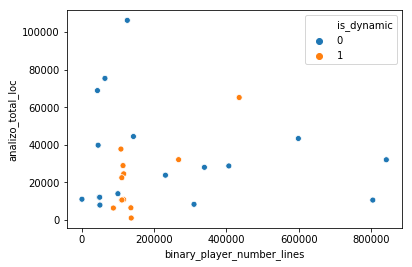

In [24]:
sns.scatterplot(x='binary_player_number_lines',y='analizo_total_loc',data=code_df_dyn,hue='is_dynamic')

### Corrleation matrix 

In [9]:
code_df_dyn[['analizo_total_loc','binary_player_number_lines']].corr()

,analizo_total_loc,binary_player_number_lines
analizo_total_loc,1.000000,0.059783
binary_player_number_lines,0.059783,1.000000


## Disassembly CC VS source code CC 

### Plot

In [10]:
code_df_dyn = code_df_dyn.sort_values('player_function_cc_radare2_mean').reset_index(drop=True)

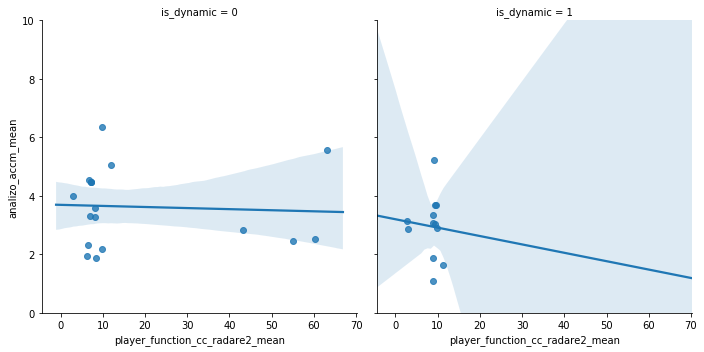

In [11]:
g = sns.lmplot(x='player_function_cc_radare2_mean',y='analizo_accm_mean',col='is_dynamic' ,data=code_df_dyn)
g.set(ylim=(0, 10))

### Corrleation matrix

In [12]:
code_df_dyn[['analizo_accm_mean','player_function_cc_radare2_mean']].corr()

,analizo_accm_mean,player_function_cc_radare2_mean
analizo_accm_mean,1.000000,0.029952
player_function_cc_radare2_mean,0.029952,1.000000
